In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<div class="document" id="blob-detection">
<h1 class="title">Blob Detection</h1>
<p>Blobs are bright on dark or dark on bright regions in an image. In
this example, blobs are detected using 3 algorithms. The image used
in this case is the Hubble eXtreme Deep Field. Each bright dot in the
image is a star or a galaxy.</p>
<div class="section" id="laplacian-of-gaussian-log">
<h1>Laplacian of Gaussian (LoG)</h1>
<p>This is the most accurate and slowest approach. It computes the Laplacian
of Gaussian images with successively increasing standard deviation and
stacks them up in a cube. Blobs are local maximas in this cube. Detecting
larger blobs is especially slower because of larger kernel sizes during
convolution. Only bright blobs on dark backgrounds are detected. See
<tt class="py-meth docutils literal">skimage.feature.blob_log</tt> for usage.</p>
</div>
<div class="section" id="difference-of-gaussian-dog">
<h1>Difference of Gaussian (DoG)</h1>
<p>This is a faster approximation of LoG approach. In this case the image is
blurred with increasing standard deviations and the difference between
two successively blurred images are stacked up in a cube. This method
suffers from the same disadvantage as LoG approach for detecting larger
blobs. Blobs are again assumed to be bright on dark. See
<tt class="py-meth docutils literal">skimage.feature.blob_dog</tt> for usage.</p>
</div>
<div class="section" id="determinant-of-hessian-doh">
<h1>Determinant of Hessian (DoH)</h1>
<p>This is the fastest approach. It detects blobs by finding maximas in the
matrix of the Determinant of Hessian of the image. The detection speed is
independent of the size of blobs as internally the implementation uses
box filters instead of convolutions. Bright on dark as well as dark on
bright blobs are detected. The downside is that small blobs (&lt;3px) are not
detected accurately. See <tt class="py-meth docutils literal">skimage.feature.blob_doh</tt> for usage.</p>
</div>
</div>


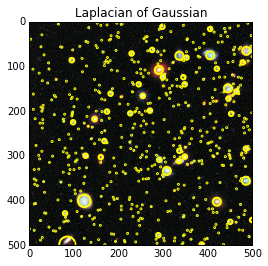

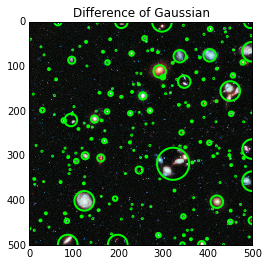

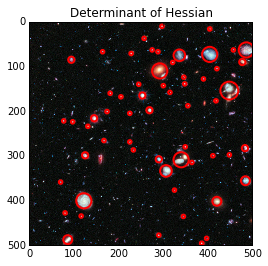

In [2]:
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

for blobs, color, title in sequence:
    fig, ax = plt.subplots(1, 1)
    ax.set_title(title)
    ax.imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()


In [4]:
amin(image_gray)

0.0